In [1]:
import numpy as np
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
import matplotlib.pyplot as plt

# Diese Erweiterung erlaubt den "magischen" Kommentar `##:`
%load_ext ipydex.displaytools
# %matplotlib inline

# Datenvisualisierung

In [2]:
# Daten erzeugen
x = np.linspace(-3, 10, 50)
y = x**2

# Daten plotten (blau, durchgezogene Linie, und Punktmarkierung)
plt.plot(x, y, ".-")

In [3]:
uu = np.linspace(0, 2, 50)


R = 1000

ii_R = uu/R
ii_D = 0.0004*(np.exp(1*uu) - 1)


plt.plot(uu, ii_R, "-", label="Widerstand")
plt.plot(uu, ii_D, "-", label="Diode")
plt.legend()

plt.xlabel("U in V")
plt.ylabel("I in A")
plt.grid(True)

In [4]:
%matplotlib inline

In [5]:
# Schnittpunkt numerisch bestimmen:

plt.plot(uu, ii_R - ii_D, '.')
plt.plot(uu, ii_R - ii_D, '-', alpha=0.3)

plt.grid()
plt.xticks(uu)
plt.xlim(1.4, 1.8)
pass

---
<br><br><br>

In Jupyter-Notebooks lassen sich auch klassische **interaktive** GUI-Elemente nutzen, wie das folgende Beispiel zeigt:

## Aufgabe: Visualisierung von Taylor-Polynomen verschiedener Ordnung


<div style="font-size:150%;">

Geg:

- $f(x) = \sin(ax)$


Ges:

- grafische Darstellung der Approximation mittels sogenannter "Taylor-Polynome" $\hat f_k(x; x_0) := \sum_{i=0}^k\frac{1}{k!}\left.\frac{d^k}{dx^k} f(x)\right|_{x=x_0}$
    
</div>


In [6]:
# Vorbereitung

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from sympy import sin

# the following requires `pip install symbtools ipywidgets`
import symbtools as st
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

plt.rcParams["axes.titlesize"] = "xx-large"


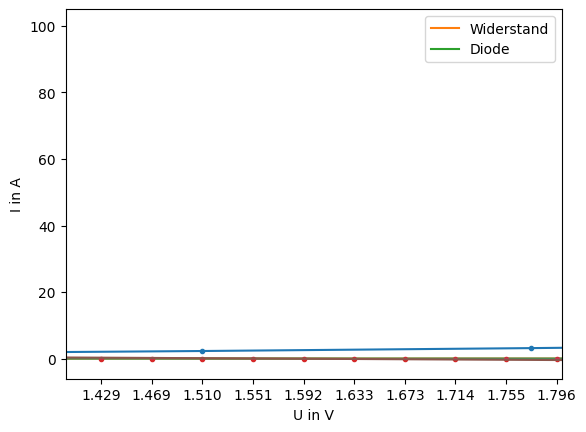

In [7]:
x, x0, a = sp.symbols("x, x0, a")

f1 = sin(a*x)# *f1
func1 = sp.lambdify((a, x), f1)


xx_values = np.linspace(-10, 10, 300)

a1 = 2
plt.plot(xx_values, func1(a1, xx_values))
plt.show()


In [8]:
# Vorabbrechnung der symbolischen Ausdrücke für die Taylor-Approximationen bis zur 12. Ordnung
# (Das ist sinnvoll aus Performance-Gründen.)

taylor_expressions = []
taylor_funcs = []

Nmax = 12

for i in range(Nmax + 1):
    # taylor_expr = sp.series(f2, x, x0, n=i)
    taylor_expr = st.multi_taylor(f1, (x,), (x0, ), order=i)
    taylor_expressions.append(taylor_expr)
    taylor_funcs.append(st.expr_to_func((a, x, x0), taylor_expr.removeO()))


In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [12]:
# Shift + ← bzw. → zum graduellen Verändern der Bedienelemente benutzen. 

fapp = sp.Symbol("f_approx")
n_slider = widgets.IntSlider(min=0, max=Nmax,step=1,value=1)

@interact(x01=(-4.5, 5.5, 0.2), a1=(0.1, 2.0, 0.1), n=n_slider)
def plot_func(n, x01, a1):
    plt.figure(figsize=(15, 6))
    plt.plot(xx_values, func1(a1, xx_values), "-", lw=5)  # blue line
    plt.plot(xx_values, taylor_funcs[n](a1, xx_values, x01), color="tab:orange", lw=3)
    plt.plot([x01], func1(a1, x01), "o", ms=10, color="tab:orange")
    plt.axis([-10, 10, -1.3, 1.3])
    
    # Der folgende Code zeigt nützliche Informationen, verlangsamt aber die Visualisierung
    if 1:
        expr0 = taylor_expressions[n].subs([(x0, x01), (a, a1)])
        expr1 = (st.simplify_numbers(expr0))
        eq = sp.Equality(fapp, expr1)
        plt.title(f"Taylor-Approximation von $f(x) = \\sin(ax)$ mit a={a1}\n${sp.latex(eq)}$")
        

    plt.show()


interactive(children=(IntSlider(value=1, description='n', max=12), FloatSlider(value=0.5, description='x01', m…

In [11]:
q = (st.simplify_numbers(taylor_expressions[3].subs([(x0, 1.7), (a, 1.2)])))

In [47]:
q.subs([(2.0, 2)]).expand()

In [13]:
# Einfacheres Beispiel für interact: Slider-Wert mit 5 multiplizieren und ausgeben

@interact(n=(0, 7, 1))
def print_func(n):
    y = 5*n
    print(y)


interactive(children=(IntSlider(value=3, description='n', max=7), Output()), _dom_classes=('widget-interact',)…

In [4]:

# Bisher war das Plot-Ergebnis eingebettet.
# Man kann es aber auch interaktiv anzeigen (gut für Zoom etc)
%matplotlib qt
plt.plot(x, y, "r-")
plt.plot(x, y2, "c-")
plt.grid(1)

# Numerisches Rechnen (lineare Algebra)

Hier wird das Modul `numpy` benuzt. Siehe oben: `import numpy as np`.

In [5]:
# Definieren eines 2d-Arrays (3x3-Matrix)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9.]]) ##:


# Elementweise Rechnungen

M1 = M * -10 ##:
M2 = M + 20 ##:
M3 = M**2 ##:


# Determinante

det_M = np.linalg.det(M) ##:

M := array([[1., 2., 3.],
            [4., 5., 6.],
            [7., 8., 9.]])

---


M1 := array([[-10., -20., -30.],
             [-40., -50., -60.],
             [-70., -80., -90.]])

---


M2 := array([[21., 22., 23.],
             [24., 25., 26.],
             [27., 28., 29.]])

---


M3 := array([[ 1.,  4.,  9.],
             [16., 25., 36.],
             [49., 64., 81.]])

---


---


In [6]:
# Ein bestimmtes Element adressieren (Index-Zählung beginnt bei 0)

M[0, 0] ##:
M[1, 2] ##:

# bestimmtes Element verändern:

M[1, 2] = -5

M ##:

___


___


M  := array([[ 1.,  2.,  3.],
             [ 4.,  5., -5.],
             [ 7.,  8.,  9.]])

___


In [7]:
# Mehrere Elemente adressieren ("indizieren")

# oberen zwei Elemente der "ersten Spalete" (Index: 0)
M[0:2, 0:1] ##:


# erste Spalte (Index 0) mit -1 multiplizieren
M[:, 0]*=0.1

M ##:

# Matrix transponieren

Q = M.T ##:


M[0:2, 0:1]  := array([[1.],
                       [4.]])

___


M  := array([[ 0.1,  2. ,  3. ],
             [ 0.4,  5. , -5. ],
             [ 0.7,  8. ,  9. ]])

___


Q := array([[ 0.1,  0.4,  0.7],
            [ 2. ,  5. ,  8. ],
            [ 3. , -5. ,  9. ]])

---


In [8]:
# Eigenwerte und Eigenvektoren bestimmen

np.set_printoptions(linewidth=270, precision=8)
eigvals, eigvects = np.linalg.eig(M)

eigvals ##:
eigvects ##:

eigvals  := array([-0.07800865+0.j        ,  7.08900432+5.86106005j,  7.08900432-5.86106005j])

___


eigvects  := array([[ 0.99657905+0.j        , -0.23770953+0.03821822j, -0.23770953-0.03821822j],
                    [-0.08254304+0.j        ,  0.20329509-0.56306126j,  0.20329509+0.56306126j],
                    [-0.00410453+0.j        , -0.7639808 +0.j        , -0.7639808 -0.j        ]])

___


**Beobachtung**: Es resultieren 1 reeller Eigenwert und zwei komplexe (d.h. ein konjugiert komplexes Paar).

Nebenbemerkung zu komplexen Zahlen: Die "imaginäre Einheit" $i$ bzw. in der Elektrotechnik meist $j$ ist definiert über die Gleichung

$$
j^2 = j\cdot j= -1.
$$

Eine komplexe Zahl $z$ ist die Summe $z = a + b \cdot j$ mit $a, b \in \mathbb{R}$ (reelle Zahlen). In Python schreibt man z.B. `z = -4 + 3j`.

In [9]:
# 1. Wert
w0 = eigvals[0] ##

# 1. Spalte (-> wird ein 1d-array)
v0 = eigvects[:, 0] ##:

(-0.0780086451878039+0j)

---


v0 := array([ 0.99657905+0.j, -0.08254304+0.j, -0.00410453+0.j])

---


In [10]:
# Matrix-Vektor-Multiplikation:

M@v0 ##:

# Alternative Notation (rückwärtskompatibel)

np.dot(M, v0) ##:


M@v0  := array([-0.07774178+0.j,  0.00643907+0.j,  0.00032019+0.j])

___


np.dot(M, v0)  := array([-0.07774178+0.j,  0.00643907+0.j,  0.00032019+0.j])

___


In [11]:
# Prüfen ob w0 bzw. v0 wirklich Eigenwert bzw. Eigenvektor ist von M ist

w0*v0 ##:

# Es kommt das gleiche Ergebnis wie oben raus (bis auf "numerisches Rauschen"):
diff = w0*v0 - M@v0 ##:


w0*v0  := array([-0.07774178+0.j,  0.00643907-0.j,  0.00032019-0.j])

___


diff := array([2.77555756e-17+0.j, 1.95156391e-16-0.j, 1.92445886e-16-0.j])

---


In [12]:
# Aufspalten in Real- und Imaginärteil

eigvals ##:

np.real(eigvals) ##:
np.imag(eigvals) ##:

eigvals  := array([-0.07800865+0.j        ,  7.08900432+5.86106005j,  7.08900432-5.86106005j])

___


np.real(eigvals)  := array([-0.07800865,  7.08900432,  7.08900432])

___


np.imag(eigvals)  := array([ 0.        ,  5.86106005, -5.86106005])

___


# Symbolisches Rechnen

Hier wird das Modul `sympy` benuzt. Siehe oben: `import sympy as sp`.

In [13]:
x1, x2 = sp.symbols("x1, x2")

f = x1**3 - 7*x1**2 + 2*x1 + 4 ##:

---


In [14]:
# 1. Ableitung

f.diff(x1)

In [15]:
# 2. Ableitung
f.diff(x1, 2) ##:

# ... ausmultipliziert:
f.diff(x1, 2).expand() ##:

___


___
